In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Load your dataset
df = pd.read_csv('/content/complete_financial_data_merged.csv')  # Replace with your actual filename

# Basic info
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nData types:")
print(df.dtypes.value_counts())

print("\nMissing values summary:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

Dataset Shape: (5454, 206)

First few rows:
                 Name      Ticker                      Sub-Sector  \
0      20 Microns Ltd   20MICRONS             Specialty Chemicals   
1    360 ONE Gold ETF     GOLD360                            Gold   
2  360 ONE Silver ETF   SILVER360                          Equity   
3     360 One Wam Ltd      360ONE  Investment Banking & Brokerage   
4  3B Blackbio DX Ltd  3BBLACKBIO                   Biotechnology   

     Market Cap  Close Price   PE Ratio  Percentage Buy Reco’s  \
0    791.805199       224.69  12.693254                    0.0   
1           NaN        98.60        NaN                    0.0   
2           NaN       106.49        NaN                    0.0   
3  46031.600601      1140.50  45.337930                   90.0   
4   1353.799325      1579.45  28.411318                    0.0   

   Percentage Upside  No. of analysts with buy reco  Percentage Hold Reco's  \
0                NaN                            0.0              

In [ ]:
# Count missing values per column
df.isnull().sum().sort_values(ascending=False)


,0
Total Deposits – Banks,5413
Cash & Carry Profit,5294
Fair Value,5262
Future Close Price,5244
Lot Size,5244
...,...
Percentage Hold Reco's,30
Percentage Sell Reco's,30
No. of analysts with buy reco,26
Name,0


In [ ]:
df.describe()


,Market Cap,Close Price,PE Ratio,Percentage Buy Reco’s,Percentage Upside,No. of analysts with buy reco,Percentage Hold Reco's,Percentage Sell Reco's,Total no. of analysts,Return on Equity,...,Price / Free Cash Flow,Price / Sales,PE Premium vs Sub-sector,PB Premium vs Sub-sector,PS Premium vs Sub-sector,Dividend Yield vs Sub-sector,Sector PE,Sector PB,Sector Dividend Yield,TTM PE Ratio
count,5.235000e+03,5419.000000,5.154000e+03,5278.000000,837.000000,5428.000000,5424.000000,5424.000000,914.000000,4685.000000,...,2513.000000,5063.000000,4.910000e+03,4890.000000,4823.000000,1372.000000,5173.000000,5173.000000,5397.000000,4.339000e+03
mean,8.612261e+03,720.952442,7.577480e+14,12.034078,13.513970,1.019344,2.590391,1.130874,8.515317,11.709233,...,178.906257,17.255672,3.488305e+15,-128.410353,427.606356,0.267039,34.532118,5.777071,1.086456,-3.677610e+14
std,5.547754e+04,13866.521275,4.261421e+16,29.788606,20.386949,3.668675,10.322382,6.722461,9.642020,112.297617,...,1180.300730,131.157612,1.692706e+17,10114.288683,4384.382301,6.698341,16.448296,2.618725,0.569393,2.115009e+16
min,0.000000e+00,0.000000,-6.147298e+16,0.000000,-63.854551,0.000000,0.000000,0.000000,0.000000,-3563.636364,...,0.000000,-156.867532,-2.081211e+17,-607185.849371,-100.000000,-9.076456,0.000000,0.000000,0.000000,-1.205803e+18
25%,3.307440e+01,24.175000,4.546268e+00,0.000000,1.836643,0.000000,0.000000,0.000000,1.000000,1.393597,...,11.068185,0.828662,-8.600138e+01,-82.951768,-74.523110,-0.464579,27.189640,3.459061,0.628201,3.411197e-02
50%,1.664645e+02,90.550000,2.060236e+01,0.000000,11.306239,0.000000,0.000000,0.000000,5.000000,8.490228,...,29.298106,2.089921,-4.396670e+01,-56.729713,-38.238024,-0.044955,36.280563,6.329225,0.833797,2.056019e+01
75%,1.389003e+03,316.300000,4.501285e+01,0.000000,21.550883,0.000000,0.000000,0.000000,12.750000,18.019891,...,76.571622,5.737734,2.585863e+01,0.994187,45.682635,0.359836,37.817540,6.445965,1.598083,4.533752e+01
max,1.929750e+06,995000.000000,2.976880e+18,100.000000,139.310785,38.000000,100.000000,100.000000,44.000000,4177.777778,...,36885.788350,5365.061178,1.112854e+19,272263.859953,154056.640551,238.378936,108.515445,14.234498,2.341805,5.326822e+17


In [ ]:
Q1 = df['PE Ratio'].quantile(0.25)
Q3 = df['PE Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[(df['PE Ratio'] >= Q1 - 1.5 * IQR) & (df['PE Ratio'] <= Q3 + 1.5 * IQR)]



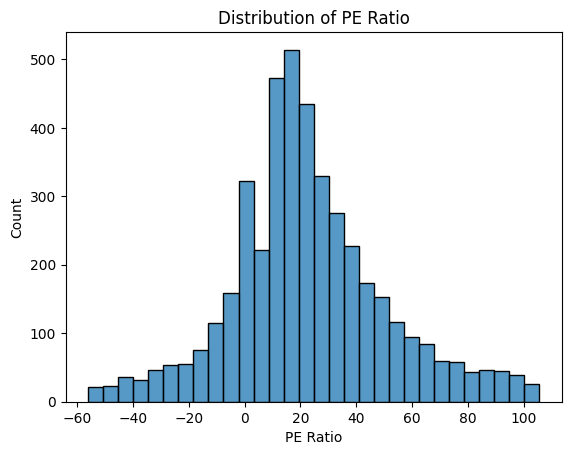

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# PE Ratio distribution
sns.histplot(df['PE Ratio'].dropna(), bins=30)
plt.title('Distribution of PE Ratio')
plt.show()


<Axes: xlabel='Market Cap', ylabel='Count'>

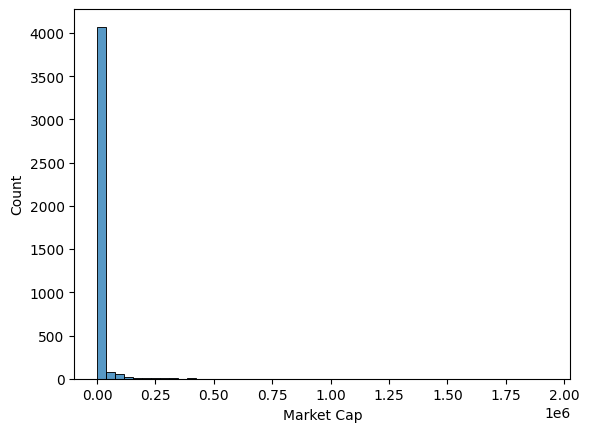

In [ ]:
sns.histplot(df['Market Cap'].dropna(), bins=50)


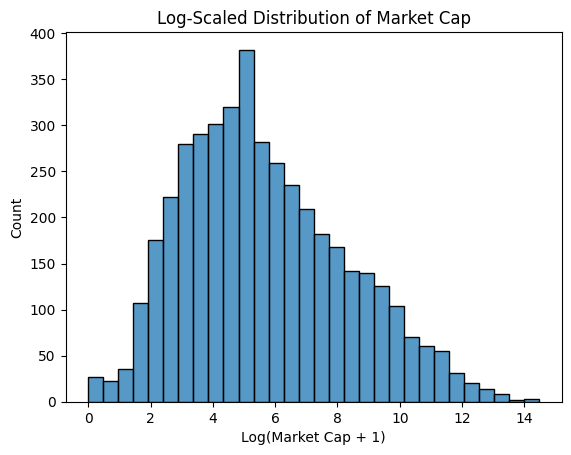

In [ ]:
import numpy as np
df['Market Cap Log'] = np.log1p(df['Market Cap'])

sns.histplot(df['Market Cap Log'].dropna(), bins=30)
plt.title('Log-Scaled Distribution of Market Cap')
plt.xlabel('Log(Market Cap + 1)')
plt.show()


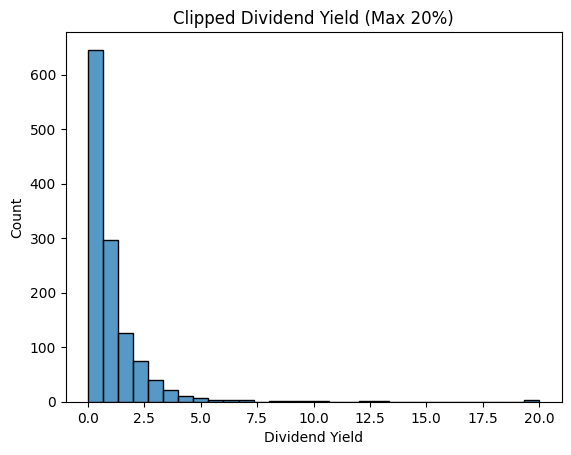

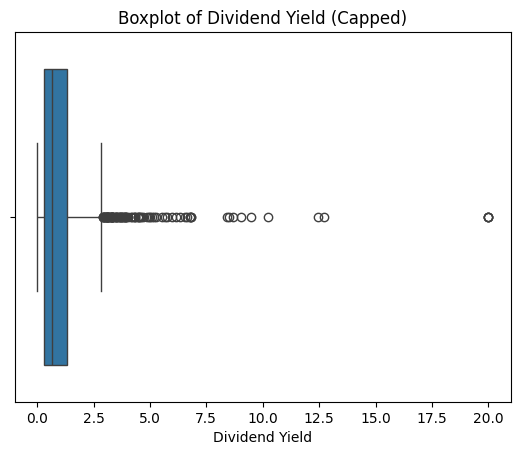

In [ ]:
clipped_dividend = df['Dividend Yield'].clip(upper=20)

sns.histplot(clipped_dividend.dropna(), bins=30)
plt.title('Clipped Dividend Yield (Max 20%)')
plt.show()
sns.boxplot(x=clipped_dividend.dropna())
plt.title('Boxplot of Dividend Yield (Capped)')
plt.show()


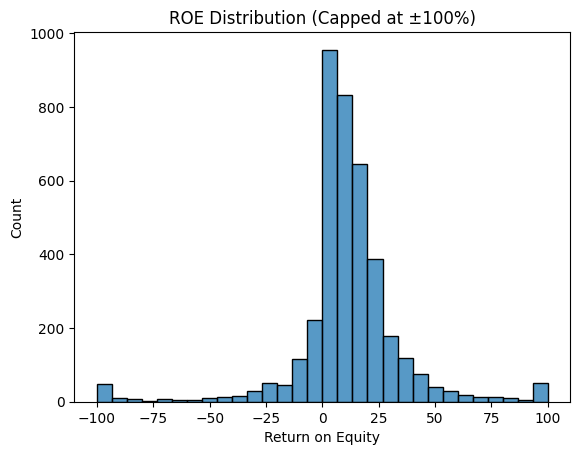

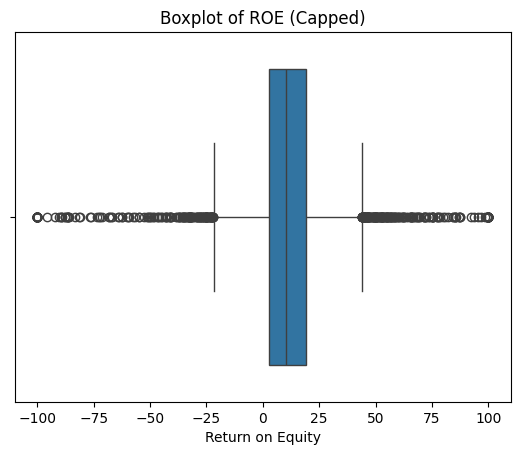

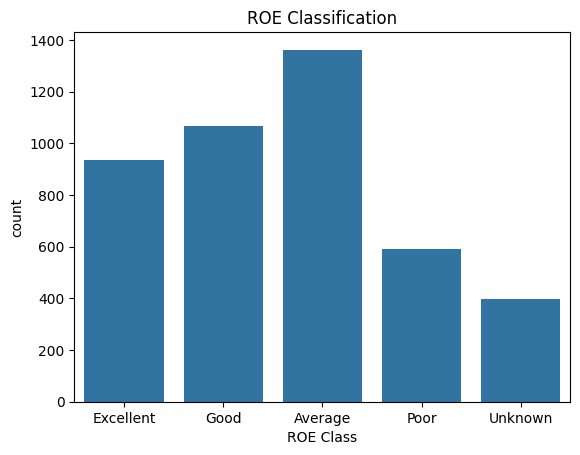

In [ ]:
clipped_roe = df['Return on Equity'].clip(lower=-100, upper=100)

sns.histplot(clipped_roe.dropna(), bins=30)
plt.title('ROE Distribution (Capped at ±100%)')
plt.show()
sns.boxplot(x=clipped_roe.dropna())
plt.title('Boxplot of ROE (Capped)')
plt.show()

def classify_roe(roe):
    if pd.isnull(roe):
        return 'Unknown'
    elif roe > 20:
        return 'Excellent'
    elif roe > 10:
        return 'Good'
    elif roe > 0:
        return 'Average'
    else:
        return 'Poor'

df['ROE Class'] = df['Return on Equity'].apply(classify_roe)

sns.countplot(x='ROE Class', data=df, order=['Excellent', 'Good', 'Average', 'Poor', 'Unknown'])
plt.title('ROE Classification')
plt.show()





🔍 Analyzing: PE Ratio


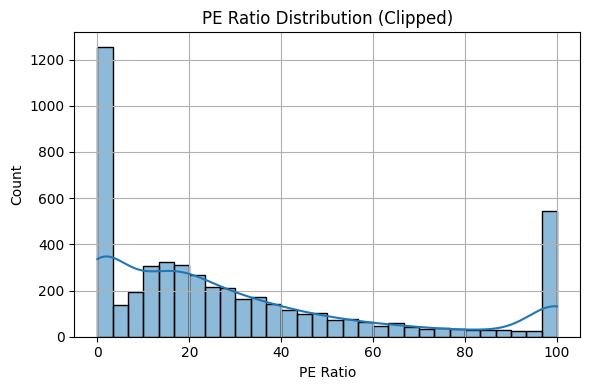

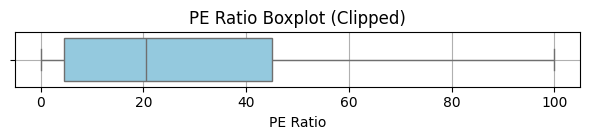


🔍 Analyzing: Market Cap


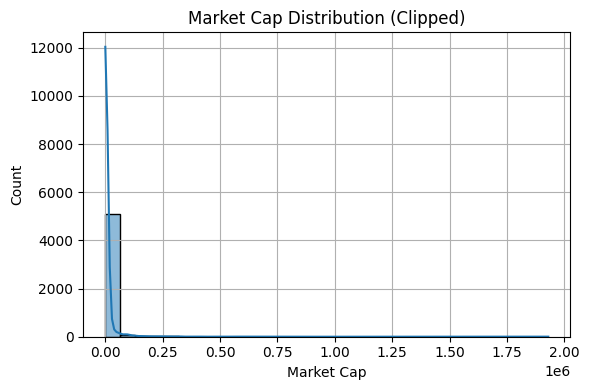

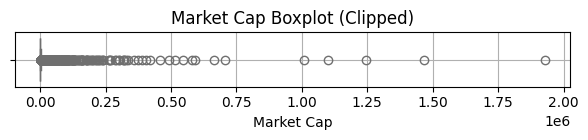


🔍 Analyzing: Dividend Yield


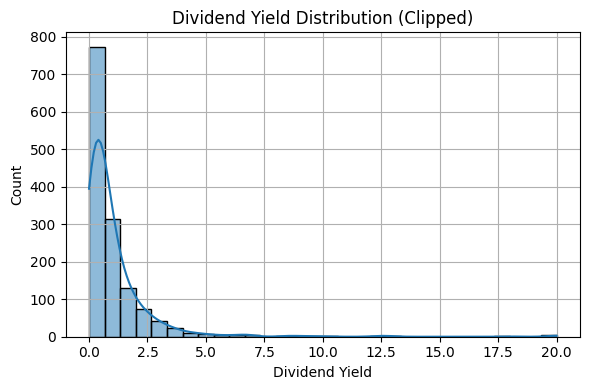

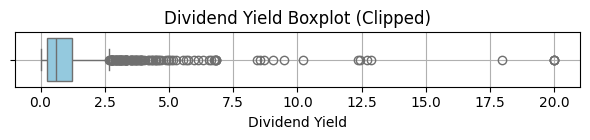


🔍 Analyzing: Return on Equity


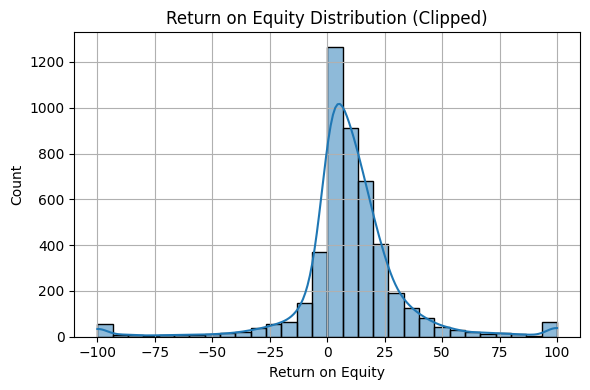

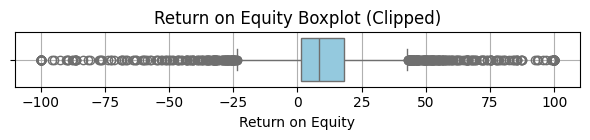


🔍 Analyzing: Net Profit Margin


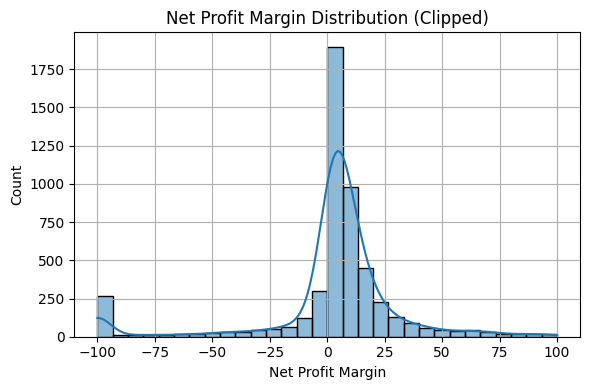

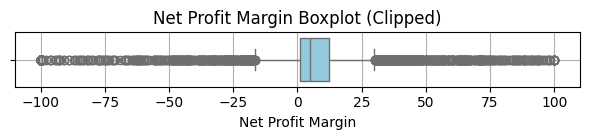


🔍 Analyzing: EBITDA Margin


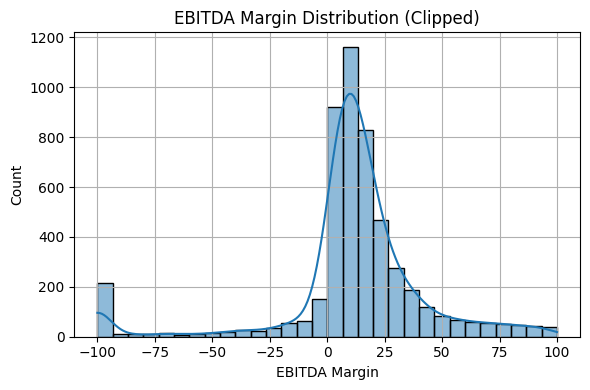

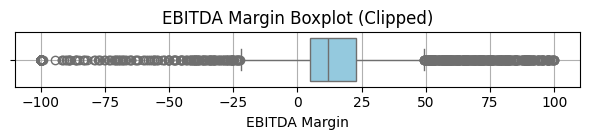

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load your data
df = pd.read_csv('/content/complete_financial_data_merged.csv')

# Step 3: Define metrics and outlier clipping ranges
metrics = {
    "PE Ratio": {"clip_min": 0, "clip_max": 100},
    "Market Cap": {"clip_min": 0, "clip_max": 1e12},  # Use 1e12 if data is large
    "Dividend Yield": {"clip_min": 0, "clip_max": 20},
    "Return on Equity": {"clip_min": -100, "clip_max": 100},
    "Net Profit Margin": {"clip_min": -100, "clip_max": 100},
    "EBITDA Margin": {"clip_min": -100, "clip_max": 100}
}

# Step 4: Plotting function
def clean_and_plot(df, metric, clip_min, clip_max):
    if metric not in df.columns:
        print(f"⚠️ Column '{metric}' not found in DataFrame.")
        return

    cleaned_series = df[metric].clip(lower=clip_min, upper=clip_max)

    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned_series.dropna(), bins=30, kde=True)
    plt.title(f'{metric} Distribution (Clipped)')
    plt.xlabel(metric)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=cleaned_series.dropna(), color='skyblue')
    plt.title(f'{metric} Boxplot (Clipped)')
    plt.xlabel(metric)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Run EDA on selected metrics
for metric, clip_vals in metrics.items():
    print(f"\n🔍 Analyzing: {metric}")
    clean_and_plot(df, metric, clip_vals["clip_min"], clip_vals["clip_max"])


In [ ]:
# Complete missing data analysis for ALL columns
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
}).sort_values('Missing_Percent', ascending=False)

# Reset index for clean display
missing_analysis = missing_analysis.reset_index(drop=True)

print("COMPLETE MISSING DATA ANALYSIS - ALL 206 COLUMNS")
print("="*80)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print("="*80)

# Display all columns with their missing percentages
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Don't truncate width
pd.set_option('display.max_colwidth', 50)  # Max column name width

print(missing_analysis[['Column', 'Missing_Count', 'Missing_Percent', 'Data_Type']].to_string(index=True))

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS:")
print("="*80)
print(f"Columns with 0% missing: {len(missing_analysis[missing_analysis['Missing_Percent'] == 0])}")
print(f"Columns with 1-10% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 0) & (missing_analysis['Missing_Percent'] <= 10)])}")
print(f"Columns with 11-25% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 10) & (missing_analysis['Missing_Percent'] <= 25)])}")
print(f"Columns with 26-50% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 25) & (missing_analysis['Missing_Percent'] <= 50)])}")
print(f"Columns with 51-75% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 50) & (missing_analysis['Missing_Percent'] <= 75)])}")
print(f"Columns with 76-90% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 75) & (missing_analysis['Missing_Percent'] <= 90)])}")
print(f"Columns with 91-100% missing: {len(missing_analysis[missing_analysis['Missing_Percent'] > 90])}")

# Reset display options back to default
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


COMPLETE MISSING DATA ANALYSIS - ALL 206 COLUMNS
Total Rows: 5454
Total Columns: 206
                                Column  Missing_Count  Missing_Percent Data_Type
0               Total Deposits – Banks           5413        99.248258   float64
1                  Cash & Carry Profit           5294        97.066373   float64
2                           Fair Value           5262        96.479648   float64
3                   Future Close Price           5244        96.149615   float64
4           1W Change in Future Volume           5244        96.149615   float64
5                             Lot Size           5244        96.149615   float64
6                  Percentage Rollover           5244        96.149615   float64
7           1D Change in Future Volume           5244        96.149615   float64
8                        Rollover Cost           5244        96.149615   float64
9                      Calendar Spread           5244        96.149615   float64
10                      

In [ ]:
# Let's check the missing percentages first
missing_percent = df.isnull().mean() * 100
print("DEBUGGING MISSING DATA:")
print("="*40)

# Check how many columns have >80% missing
high_missing = missing_percent[missing_percent > 80]
print(f"Columns with >80% missing: {len(high_missing)}")

if len(high_missing) > 0:
    print("\nTop 10 columns with >80% missing:")
    print(high_missing.head(10))
else:
    print("No columns have >80% missing data!")

# Let's see the distribution of missing percentages
print(f"\nMissing data distribution:")
print(f"0% missing: {len(missing_percent[missing_percent == 0])}")
print(f"1-20% missing: {len(missing_percent[(missing_percent > 0) & (missing_percent <= 20)])}")
print(f"21-40% missing: {len(missing_percent[(missing_percent > 20) & (missing_percent <= 40)])}")
print(f"41-60% missing: {len(missing_percent[(missing_percent > 40) & (missing_percent <= 60)])}")
print(f"61-80% missing: {len(missing_percent[(missing_percent > 60) & (missing_percent <= 80)])}")
print(f"81-100% missing: {len(missing_percent[missing_percent > 80])}")

# Show the highest missing percentages
print(f"\nTop 15 columns with highest missing data:")
top_missing = missing_percent.sort_values(ascending=False).head(15)
for col, pct in top_missing.items():
    print(f"{col}: {pct:.1f}%")

# Check if your exception column exists and its missing percentage
if "3Y Historical Dividend Growth" in df.columns:
    exception_missing = missing_percent["3Y Historical Dividend Growth"]
    print(f"\nException column '3Y Historical Dividend Growth': {exception_missing:.1f}% missing")
else:
    print(f"\nException column '3Y Historical Dividend Growth' not found in dataset!")


DEBUGGING MISSING DATA:
Columns with >80% missing: 1

Top 10 columns with >80% missing:
3Y Historical Dividend Growth    81.206454
dtype: float64

Missing data distribution:
0% missing: 2
1-20% missing: 125
21-40% missing: 15
41-60% missing: 7
61-80% missing: 7
81-100% missing: 1

Top 15 columns with highest missing data:
3Y Historical Dividend Growth: 81.2%
Cash Conversion Cycle: 77.3%
Fundamental Score: 77.0%
Dividend Yield vs Sub-sector: 74.8%
Dividend Yield vs Sector: 74.3%
Dividend Yield: 74.3%
5Y Hist Op. Cash Flow Growth: 65.7%
Deferred Tax Assets (Net): 62.6%
Deferred Tax Liabilities (Net): 59.7%
Minority Interest: 55.1%
EV / Free Cash Flow: 54.3%
Price / Free Cash Flow: 53.9%
5Y Historical EPS Growth: 53.4%
5Y Historical EBITDA Growth: 44.0%
Price / CFO: 41.3%

Exception column '3Y Historical Dividend Growth': 81.2% missing


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Columns: 157 entries, Name to TTM PE Ratio
dtypes: float64(154), object(3)
memory usage: 6.5+ MB
None


In [ ]:
# Calculate percentage of missing values
missing_percent = df.isnull().mean() * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': missing_percent
})

# Filter columns with missing values and sort
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.sort_values(by='Missing_Percent', ascending=False)


# Configure pandas to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Don't wrap lines
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Don't truncate column names

# Display
print(missing_summary)



                                  Missing_Count  Missing_Percent
3Y Historical Dividend Growth              4429        81.206454
Cash Conversion Cycle                      4214        77.264393
Fundamental Score                          4200        77.007701
Dividend Yield vs Sub-sector               4082        74.844151
Dividend Yield vs Sector                   4052        74.294096
Dividend Yield                             4052        74.294096
5Y Hist Op. Cash Flow Growth               3586        65.749908
Deferred Tax Assets (Net)                  3415        62.614595
Deferred Tax Liabilities (Net)             3255        59.680968
Minority Interest                          3006        55.115512
EV / Free Cash Flow                        2960        54.272094
Price / Free Cash Flow                     2941        53.923726
5Y Historical EPS Growth                   2912        53.392006
5Y Historical EBITDA Growth                2401        44.022736
Price / CFO              

In [ ]:
# Complete missing data analysis for ALL columns
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
}).sort_values('Missing_Percent', ascending=False)

# Reset index for clean display
missing_analysis = missing_analysis.reset_index(drop=True)

# Save to CSV file
missing_analysis.to_csv('missing_data_analysis.csv', index=False)
print("✓ Saved to: missing_data_analysis.csv")

print("COMPLETE MISSING DATA ANALYSIS - ALL 206 COLUMNS")
print("="*80)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print("="*80)

# Display all columns with their missing percentages
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Don't truncate width
pd.set_option('display.max_colwidth', 50)  # Max column name width

print(missing_analysis[['Column', 'Missing_Count', 'Missing_Percent', 'Data_Type']].to_string(index=True))

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS:")
print("="*80)
print(f"Columns with 0% missing: {len(missing_analysis[missing_analysis['Missing_Percent'] == 0])}")
print(f"Columns with 1-10% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 0) & (missing_analysis['Missing_Percent'] <= 10)])}")
print(f"Columns with 11-25% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 10) & (missing_analysis['Missing_Percent'] <= 25)])}")
print(f"Columns with 26-50% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 25) & (missing_analysis['Missing_Percent'] <= 50)])}")
print(f"Columns with 51-75% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 50) & (missing_analysis['Missing_Percent'] <= 75)])}")
print(f"Columns with 76-90% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 75) & (missing_analysis['Missing_Percent'] <= 90)])}")
print(f"Columns with 91-100% missing: {len(missing_analysis[missing_analysis['Missing_Percent'] > 90])}")

# Reset display options back to default
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

✓ Saved to: missing_data_analysis.csv
COMPLETE MISSING DATA ANALYSIS - ALL 206 COLUMNS
Total Rows: 5454
Total Columns: 157
                               Column  Missing_Count  Missing_Percent Data_Type
0       3Y Historical Dividend Growth           4429        81.206454   float64
1               Cash Conversion Cycle           4214        77.264393   float64
2                   Fundamental Score           4200        77.007701   float64
3        Dividend Yield vs Sub-sector           4082        74.844151   float64
4            Dividend Yield vs Sector           4052        74.294096   float64
5                      Dividend Yield           4052        74.294096   float64
6        5Y Hist Op. Cash Flow Growth           3586        65.749908   float64
7           Deferred Tax Assets (Net)           3415        62.614595   float64
8      Deferred Tax Liabilities (Net)           3255        59.680968   float64
9                   Minority Interest           3006        55.115512   float

In [ ]:
from google.colab import files

# Define fundamental columns
fundamental_columns = [
    # 🟢 Valuation
    'PE Ratio', 'PB Ratio', 'PS Ratio', 'EV/EBITDA Ratio', 'EV / Revenue Ratio',
    'Price / Sales', 'Price / Free Cash Flow', 'Market Cap', 'Enterprise Value',
    'Dividend Yield', 'Dividend Per Share', 'Earnings Per Share', 'Payout Ratio',
    'Free Cash Flow',

    # 🟢 Profitability
    'Net Profit Margin', 'EBITDA Margin', 'Return on Assets', 'Return on Equity',
    'Return on Investment', 'ROCE', 'Cash Flow Margin', 'Operating Cash Flow',

    # 🟢 Efficiency
    'Inventory Turnover Ratio', 'Asset Turnover Ratio', 'Working Capital Turnover Ratio',
    'Days of Inventory Outstanding', 'Days Payable Outstanding', 'Days of Sales Outstanding',

    # 🟢 Leverage
    'Debt to Equity', 'Long Term Debt to Equity', 'Interest Coverage Ratio',

    # 🟢 Growth
    '3Y Historical Dividend Growth', '5Y Historical Revenue Growth',
    '5Y Historical EBITDA Growth', '5Y Historical EPS Growth',
    '1Y Historical Revenue Growth', '1Y Historical EBITDA Growth', '1Y Historical EPS Growth',
    '5Y Avg Return on Equity', '5Y Avg Return on Assets', '5Y Avg Return on Investment',
    '5Y Avg Net Profit Margin', '5Y Avg EBITDA Margin',

    # 🟢 Cash Flow
    'Free Cash Flow', 'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
    'Change in Working Capital',

    # 🟢 Balance Sheet
    'Total Assets', 'Total Liabilities', 'Total Equity', 'Share Capital',
    'Reserves & Surplus', 'Net Property,Plant & Equipment', 'Cash and Equivalent',
    'Long Term Debt', 'Accounts Payable', 'Total Receivables', 'Total Inventory',
    'Goodwill & Intangibles', 'Other Assets', 'Other Liabilities',
]

# Include identifiers
identifiers = ['Name', 'Ticker', 'Sub-Sector']
columns_to_include = [col for col in identifiers + fundamental_columns if col in df.columns]

# Filter and export
df_fundamentals = df[columns_to_include]
filtered_filename = "filtered_fundamentals11.csv"
df_fundamentals.to_csv(filtered_filename, index=False)
files.download(filtered_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f=pd.read_csv('/content/filtered_fundamentals.csv')



# Complete missing data analysis for ALL columns
missing_analysis = pd.DataFrame({
    'Column': f.columns,
    'Missing_Count': f.isnull().sum().values,
    'Missing_Percent': (f.isnull().sum() / len(f) * 100).values,
    'Data_Type': f.dtypes.values
}).sort_values('Missing_Percent', ascending=False)

# Reset index for clean display
missing_analysis = missing_analysis.reset_index(drop=True)

# Save to CSV file
missing_analysis.to_csv('missing_data_analysis.csv', index=False)
print("✓ Saved to: missing_data_analysis.csv")

print("COMPLETE MISSING DATA ANALYSIS - ALL 206 COLUMNS")
print("="*80)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print("="*80)

# Display all columns with their missing percentages
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Don't truncate width
pd.set_option('display.max_colwidth', 50)  # Max column name width

print(missing_analysis[['Column', 'Missing_Count', 'Missing_Percent', 'Data_Type']].to_string(index=True))

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS:")
print("="*80)
print(f"Columns with 0% missing: {len(missing_analysis[missing_analysis['Missing_Percent'] == 0])}")
print(f"Columns with 1-10% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 0) & (missing_analysis['Missing_Percent'] <= 10)])}")
print(f"Columns with 11-25% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 10) & (missing_analysis['Missing_Percent'] <= 25)])}")
print(f"Columns with 26-50% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 25) & (missing_analysis['Missing_Percent'] <= 50)])}")
print(f"Columns with 51-75% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 50) & (missing_analysis['Missing_Percent'] <= 75)])}")
print(f"Columns with 76-90% missing: {len(missing_analysis[(missing_analysis['Missing_Percent'] > 75) & (missing_analysis['Missing_Percent'] <= 90)])}")
print(f"Columns with 91-100% missing: {len(missing_analysis[missing_analysis['Missing_Percent'] > 90])}")

# Reset display options back to default
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


✓ Saved to: missing_data_analysis.csv
COMPLETE MISSING DATA ANALYSIS - ALL 206 COLUMNS
Total Rows: 5454
Total Columns: 157
                            Column  Missing_Count  Missing_Percent Data_Type
0    3Y Historical Dividend Growth           4429        81.206454   float64
1                   Dividend Yield           4052        74.294096   float64
2           Price / Free Cash Flow           2941        53.923726   float64
3         5Y Historical EPS Growth           2912        53.392006   float64
4      5Y Historical EBITDA Growth           2401        44.022736   float64
5          5Y Avg Return on Equity           1907        34.965163   float64
6         Inventory Turnover Ratio           1875        34.378438   float64
7      5Y Avg Return on Investment           1700        31.169784   float64
8          Interest Coverage Ratio           1589        29.134580   float64
9          5Y Avg Return on Assets           1405        25.760909   float64
10    5Y Historical Revenue Gr

In [ ]:
dhan_data=pd.read_csv('/content/Dhan - All Stocks List.csv')
filtered_data=pd.read_csv('/content/filtered_fundamentals11.csv')
print(filtered_data.columns)
print(dhan_data.columns)

Index(['Name', 'Ticker', 'Sub-Sector', 'PE Ratio', 'PB Ratio', 'PS Ratio',
       'EV/EBITDA Ratio', 'EV / Revenue Ratio', 'Price / Sales',
       'Price / Free Cash Flow', 'Market Cap', 'Enterprise Value',
       'Dividend Yield', 'Dividend Per Share', 'Earnings Per Share',
       'Payout Ratio', 'Free Cash Flow', 'Net Profit Margin', 'EBITDA Margin',
       'Return on Assets', 'Return on Equity', 'Return on Investment', 'ROCE',
       'Cash Flow Margin', 'Operating Cash Flow', 'Inventory Turnover Ratio',
       'Asset Turnover Ratio', 'Working Capital Turnover Ratio',
       'Days of Sales Outstanding', 'Debt to Equity',
       'Long Term Debt to Equity', 'Interest Coverage Ratio',
       '3Y Historical Dividend Growth', '5Y Historical Revenue Growth',
       '5Y Historical EBITDA Growth', '5Y Historical EPS Growth',
       '1Y Historical Revenue Growth', '1Y Historical EBITDA Growth',
       '1Y Historical EPS Growth', '5Y Avg Return on Equity',
       '5Y Avg Return on Assets', '5Y

In [ ]:
import pandas as pd

# Load datasets
wc = pd.read_csv('/content/Stock_Screener_6_17_2025_cagr.csv', on_bad_lines='skip')
filtered_data = pd.read_csv('/content/filtered_fundamentals11.csv')

# Step 1: Clean the 'Name' field for better matching
def clean_name(name):
    return str(name).strip().lower().replace(' ltd', '').replace('.', '').replace(' limited', '')

for df in [wc, filtered_data]:
    df['Name'] = df['Name'].apply(clean_name)

# Step 2: Perform the merge
merge_keys = ['Name', 'Ticker', 'Sub-Sector']
merged_df = pd.merge(wc, filtered_data, on=merge_keys, how='inner')  # Use inner to get only matched rows

# Step 3: Analyze the result
print("=== MERGE COMPLETE ===")
print(f"Merged rows: {len(merged_df)}")
print(f"Columns in merged dataset: {len(merged_df.columns)}")

# COMPLETE MISSING VALUES ANALYSIS
print("\n" + "="*80)
print("COMPLETE MISSING VALUES ANALYSIS - ALL COLUMNS")
print("="*80)

# Calculate missing values for all columns
missing_analysis = pd.DataFrame({
    'Column_Name': merged_df.columns,
    'Missing_Count': merged_df.isnull().sum(),
    'Total_Rows': len(merged_df),
    'Missing_Percentage': (merged_df.isnull().sum() / len(merged_df) * 100).round(2),
    'Non_Missing_Count': merged_df.count(),
    'Data_Type': merged_df.dtypes
})

# Sort by missing count (descending)
missing_analysis = missing_analysis.sort_values('Missing_Count', ascending=False)

# Display the complete analysis
print(f"\nDataset Shape: {merged_df.shape}")
print(f"Total Columns: {len(merged_df.columns)}")
print(f"Total Rows: {len(merged_df)}")

print(f"\n{'Column Name':<40} {'Missing':<10} {'%Missing':<10} {'Available':<10} {'Data Type':<15}")
print("-" * 95)

for _, row in missing_analysis.iterrows():
    print(f"{row['Column_Name']:<40} {row['Missing_Count']:<10} {row['Missing_Percentage']:<10}% {row['Non_Missing_Count']:<10} {str(row['Data_Type']):<15}")

# Summary statistics
completely_missing = missing_analysis[missing_analysis['Missing_Count'] == len(merged_df)]
no_missing = missing_analysis[missing_analysis['Missing_Count'] == 0]
partial_missing = missing_analysis[(missing_analysis['Missing_Count'] > 0) & (missing_analysis['Missing_Count'] < len(merged_df))]

print(f"\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Columns with NO missing values: {len(no_missing)}")
print(f"Columns with SOME missing values: {len(partial_missing)}")
print(f"Columns with ALL missing values: {len(completely_missing)}")

if len(completely_missing) > 0:
    print(f"\nColumns with 100% missing data:")
    for col in completely_missing['Column_Name']:
        print(f"  - {col}")

if len(no_missing) > 0:
    print(f"\nColumns with 0% missing data:")
    for col in no_missing['Column_Name']:
        print(f"  - {col}")

# Show columns with highest missing percentages
print(f"\nTop 15 columns with most missing data:")
print(missing_analysis.head(15)[['Column_Name', 'Missing_Count', 'Missing_Percentage']])

# Optional: Save to CSV
merged_df.to_csv('wc_filtered_merged.csv', index=False)
missing_analysis.to_csv('missing_values_analysis.csv', index=False)

print(f"\nFiles saved:")
print(f"- Merged dataset: wc_filtered_merged.csv")
print(f"- Missing values analysis: missing_values_analysis.csv")

print(f"\nOriginal filtered_data columns:")
print(filtered_data.columns.tolist())


merged_df.to_csv('/mnt/data/final_added_cagr.csv', index=False)


=== MERGE COMPLETE ===
Merged rows: 5444
Columns in merged dataset: 70

COMPLETE MISSING VALUES ANALYSIS - ALL COLUMNS

Dataset Shape: (5444, 70)
Total Columns: 70
Total Rows: 5444

Column Name                              Missing    %Missing   Available  Data Type      
-----------------------------------------------------------------------------------------------
3Y Historical Dividend Growth            4419       81.17     % 1025       float64        
Dividend Yield                           4042       74.25     % 1402       float64        
Price / Free Cash Flow                   2931       53.84     % 2513       float64        
5Y Historical EPS Growth                 2902       53.31     % 2542       float64        
5Y Historical EBITDA Growth              2391       43.92     % 3053       float64        
5Y Avg Return on Equity                  1898       34.86     % 3546       float64        
Inventory Turnover Ratio                 1865       34.26     % 3579       float64    

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
def clean_keys(df):
    df['Name'] = df['Name'].astype(str).str.strip().str.lower()
    df['Ticker'] = df['Ticker'].astype(str).str.strip().str.upper()
    df['Sub-Sector'] = df['Sub-Sector'].astype(str).str.strip().str.lower()
    return df

# Clean all three DataFrames
cagr = clean_keys(cagr)
wc = clean_keys(wc)
filtered = clean_keys(filtered)

# Now merge again with cleaned keys
merged1 = pd.merge(cagr, wc, on=['Name', 'Ticker', 'Sub-Sector'], how='outer')
final_merged = pd.merge(merged1, filtered, on=['Name', 'Ticker', 'Sub-Sector'], how='outer')
final_merged = final_merged.loc[:, ~final_merged.columns.duplicated()]

# Save the clean merged result
final_merged.to_csv('clean_merged_fundamentals.csv', index=False)

# Download in Colab
from google.colab import files
files.download('clean_merged_fundamentals.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>